# DATA 1 Practical 9

Simos Gerasimou


## "...all models are wrong, but some are useful. However, the approximate nature of the model must always be borne in mind...." (George Box) [Wikipedia](https://en.wikipedia.org/wiki/All_models_are_wrong)

**Pandas API Reference**: https://pandas.pydata.org/pandas-docs/stable/reference/index.html

**Matplotlib API Reference**: https://matplotlib.org/3.1.1/api/index.html

**Seaborn API Reference**: https://seaborn.pydata.org/api.html

**Scipy Stats API Reference**: https://docs.scipy.org/doc/scipy/reference/stats.html

**Linear regrression on Scikit Learn**: https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares


In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import math as m
import pandas as pd

from sklearn import linear_model #Check this
from sklearn import metrics
from sklearn import preprocessing

***

## **Linear Regression Example (from Lecture)**

In [13]:
#Create dataframe
priceYork = [275000, 282500, 305000, 340000, 362500]
areaYork  = [2600, 3000, 3200, 3600, 4000]
dfYork = pd.DataFrame(data={"Area":areaYork, "Price":priceYork})

#Create a linear regression object
reg = linear_model.LinearRegression()

#Train the model: pay attention to how the data are expected by the linear regression model
reg.fit(X=np.array(areaYork).reshape(-1, 1), y=priceYork)

#Predict the price for a property with area 3300
area = 3300
result = reg.predict([[area]])

print ("The price of a property of %d square feet is £%.2f" % (area, result))

The price of a property of 3300 square feet is £314357.88


***

## **Linear Regression Part A**

DataVision has been commissioned by the York City Council to analyse a set of data regarding citizens of Yorkshire and extract actionable knowledge.

The dataset for Yorkhire citizens is available on VLE (look for yorkshire.csv in the Practicals section)


**TA1) Load the Yorkshire dataset using Pandas**

**Note**: You have to download the dataset on your local machine and then load it onto the Jupyter Notebook

In [14]:
#Write your answer here
yorkshire_data = pd.read_csv("yorkshire.csv")

**TA2) Produce a scatter plot showing the age VS income**

<AxesSubplot:xlabel='age', ylabel='income'>

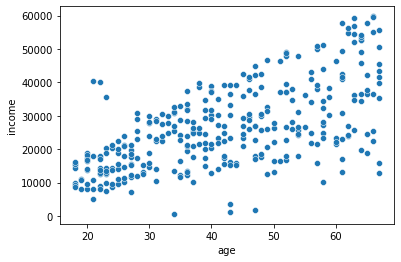

In [15]:
#Write your answer here
sns.scatterplot(x=yorkshire_data['age'], y=yorkshire_data['income'])

**TA3) Train a linear regression model to determine the "best line of fit" for this data using only the Year as the input variable**

* **Hint**: 
   * You might want to use the following library: from sklearn import linear_model
   * You might want to check https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
   * Pay attention to how the data should be shaped

In [16]:
#Write your answer here
ageIncomeRegression = linear_model.LinearRegression(fit_intercept=True)
ageIncomeDataX = np.array([yorkshire_data['age']]).reshape(-1,1)
ageIncomeRegression = ageIncomeRegression.fit(ageIncomeDataX, yorkshire_data['income'])

**TA4) Extract and report the coefficients (regression and intercept coefficient) of the trained linear regression model**

In [17]:
print(f"Coefficient: {ageIncomeRegression.coef_}, Intercept: {ageIncomeRegression.intercept_}")

Coefficient: [539.11507264], Intercept: 3631.49023086526


**TA5) Calculate the regression and intercept coefficients using their formulae and confirm that they match the result derived in task TA4**

In [18]:
#Write your answer here


**TA6) Using your age, make a prediction about your income in 10 years time (i.e., your age in 2031). Also, report the complete linear regression model**


In [19]:
#Write your answer here
ageIncomeRegression.predict([[28]])

array([18726.71226484])

**TA7) Plot the linear regression model alongside the scatter plot from TA2**

**Hint:** 
  * Invoke the plotting functions (one for the scatter plot, one for the linear regression model) one after the other
  * To generate the linear regression model, you can use (i) high school maths or (ii) the predict() method of the LinearRegression library



<AxesSubplot:xlabel='age', ylabel='income'>

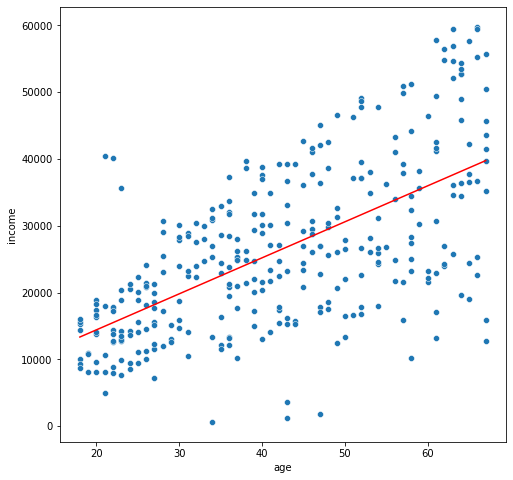

In [20]:
#Write your answer here
fig = plt.figure(num=1, figsize=(8,8))
ax = fig.add_subplot()
sns.scatterplot(x=yorkshire_data['age'], y=yorkshire_data['income'])
linearSpace = np.linspace(yorkshire_data['age'].min(),yorkshire_data['age'].max(), num=(yorkshire_data['age'].max()-yorkshire_data['age'].min()))
sns.lineplot(x=linearSpace, y=((linearSpace*ageIncomeRegression.coef_) + ageIncomeRegression.intercept_), color='r')

*** 

## **Linear Regression Part B**

A dietetics and nutrition instructor wants to analyse how well educated are sports science students about the usefuleness of calcium and its recommended daily intake. Also, the instructor wants to examine if knowledge about calcium can be used to predict calcium intake of the students. To answer these questions, the instructor collected data from 20 students about their calcium knowledge and calcium intake per day.


**TB1) Load the Nutrition dataset using Pandas**

**Note**: You have to download the dataset on your local machine and then load it onto the Jupyter Notebook

In [21]:
#Write your answer here
nutritionData = pd.read_csv('nutrition.csv')

**TB2) Which is the independent and which is the dependent variable?**

#Write your answer here

the independant variable is calcium intake

the dependant variable is knowledge score

**TB3) Plot a scatter plot having the independent variable on the X axis. Do you see any relationship between the variables?**

<AxesSubplot:xlabel='CalciumIntake', ylabel='KnowledgeScore'>

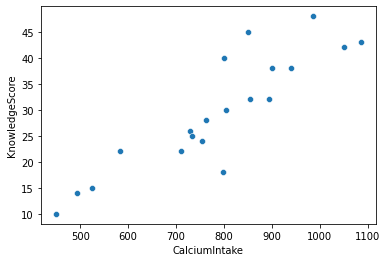

In [22]:
#Write your answer here

sns.scatterplot(x=nutritionData['CalciumIntake'], y = nutritionData['KnowledgeScore'])

**TB4) Calculate the Pearson correlation coefficient. You must show your calculations, i.e., calculate the result analytically, but you may use the appropriate scipy.stats function (or other) to check your result.**

In [23]:
#Write your answer here
nutritionPCC1 = stats.pearsonr(nutritionData['CalciumIntake'],nutritionData['KnowledgeScore'])
print(f"pearson's r value is: {nutritionPCC1[0]}")

pearson's r value is: 0.8822551379904903


**TB5) What do you think of the correlation between these two variables? What do you expect the linear regression model to be?**

#Write your answer here

they have a strong positive correlation and i would expect the linear regression model to show this


**TB6) Train a simple linear regression model to determine the "best line of fit" for this data**

In [24]:
#Write your answer here

nutritionRegression = linear_model.LinearRegression()
nutritionRegression = nutritionRegression.fit(np.array(nutritionData['CalciumIntake']).reshape(-1,1),nutritionData['KnowledgeScore'])

**TB7) Report the regression and intercept coefficients of this linear regression model. Report also the final formula of the linear regression model.**

In [25]:
#Write your answer here
print(f"coefficient: {nutritionRegression.coef_}, intercept: {nutritionRegression.intercept_}, final formula: idk bro")

coefficient: [0.05600942], intercept: -14.372995726408462, final formula: idk bro


**TB8) Calculate the regression and intercept coefficients using their formulae and confirm that they match the result derived in task TB7**

In [26]:
#Write your answer here


**TB9) Calculate the goodness of fit $R^2$. You must show your calculations, i.e., calculate the result analytically, but you may use the appropriate sklearn.metrics method to check your result.**

**Hint:** 
   * You might want to check https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics
   * To derive the $R^2$ score you need to make predictions (see lecture slides for the formulae). You may use the same dataset (used for training) for making predictions.

In [27]:
#Write your answer here
predictedValues = nutritionRegression.predict(np.array(nutritionData['CalciumIntake']).reshape(-1,1))
r2score = metrics.r2_score((np.array(nutritionData['KnowledgeScore']).reshape(-1,1)), 
np.array(predictedValues))
print(f"r² score: {r2score}")

r² score: 0.7783741285106188


In [ ]:
#Analytically
ssT = [ ((dfNut["CalciumIntake"][i]-np.mean(dfNut["CalciumIntake"]))**2) for i in range(0, len(dfNut["CalciumIntake"]))]
ssR = [ ((dfNut["CalciumIntake"][i]-predictNut[i])**2)                   for i in range(0, len(dfNut["CalciumIntake"]))]
ssM = [ ((predictNut[i]-np.mean(dfNut["CalciumIntake"]))**2)             for i in range(0, len(dfNut["CalciumIntake"]))]

print ("R2 (method A):", np.sum(ssM)/np.sum(ssT))
print ("R2 (method B):", 1 - np.sum(ssR)/np.sum(ssT))


**TB10) Plot the linear regression model alongside the scatter plot from task TB3**

<AxesSubplot:xlabel='CalciumIntake', ylabel='KnowledgeScore'>

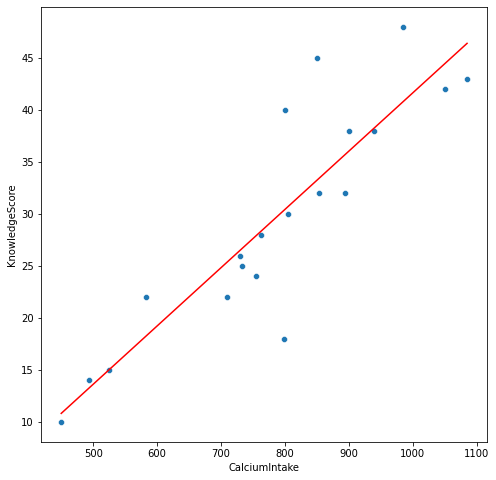

In [28]:
#Write your answer here
fig = plt.figure(num=1, figsize=(8,8))
ax = fig.add_subplot()
sns.scatterplot(x=nutritionData['CalciumIntake'], y=nutritionData['KnowledgeScore'])
minX = nutritionData['CalciumIntake'].min()
maxX = nutritionData['CalciumIntake'].max()
linearSpace2 = np.linspace(minX, maxX, num=(maxX - minX))
sns.lineplot(x=linearSpace2, y=((linearSpace2*nutritionRegression.coef_) + nutritionRegression.intercept_), color='r')

**TB11) Calculate the approximate calcium intake of a student with knowledge of calcium score equal to 30 (out of 50).**

In [29]:
#Write your answer here


*** 

## Linear Regression Part C

John Doe is interested in buying a car and wants to find one that would have an acceptable fuel consumption (in terms of miles per galon). In order to decide, he collected data from AutoTrader and other car websites and wants to analyse this data and produce regression models that will help him to make better predictions. 

**TC1) Load the cars dataset using Pandas**

**Note**: You have to download the dataset on your local machine and then load it onto the Jupyter Notebook

In [30]:
#Write your answer here
cars = pd.read_csv("cars.csv")

**TC2) Try to understand what the variables mean. If this is unclear, go to the end of this document. Also, which are the independent variables and which is the dependent variable?**

In [31]:
#Write your answer here


**TC3) Plot a scatter plot having the weight (wt) on the X axis and miles per gallon on the Y axis. Do you see any relationship between the variables?**

i see a negative correlation


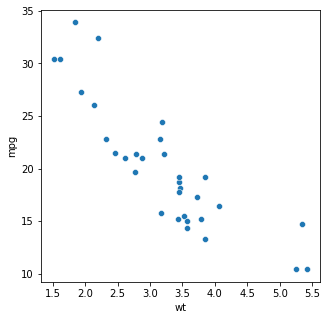

In [32]:
#Write your answer here
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot()
sns.scatterplot(x=cars['wt'], y=cars['mpg'])
print("i see a negative correlation")

**TC4) Train a simple linear regression model to determine the "best line of fit" between weight and miles per gallon and report the the final form of the regression model**

correlation: [-5.34447157], intercept: 37.28512616734204


<AxesSubplot:xlabel='wt', ylabel='mpg'>

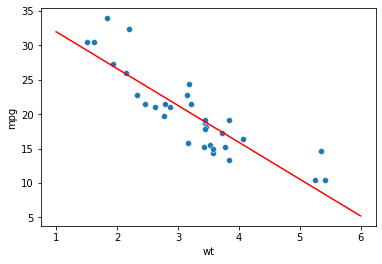

In [45]:
#Write your answer here
carRegression = linear_model.LinearRegression()
carRegression = carRegression.fit((np.array(cars['wt']).reshape(-1,1)), cars['mpg'])

print(f"correlation: {carRegression.coef_}, intercept: {carRegression.intercept_}")
linearSpace3 = np.linspace(1, 6, num=10)
sns.scatterplot(x=cars['wt'], y=cars['mpg'])
sns.lineplot(x=linearSpace3, y=((linearSpace3*carRegression.coef_) + carRegression.intercept_), color='r')

**TC5) Calculate 𝑅2 , Mean Absolute Error, Mean Squared Error and Root Mean Squared Error of this linear regression model. You may use the appropriate sklearn.metrics methods (no need to implement them again)**

**Hint:** You might want to check https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics



In [34]:
#Write your answer here
# predictedValues = nutritionRegression.predict(np.array(nutritionData['CalciumIntake']).reshape(-1,1))
# r2score = metrics.r2_score((np.array(nutritionData['KnowledgeScore']).reshape(-1,1)), 
# np.array(predictedValues))
predictedCarValues = carRegression.predict(np.array(cars['wt']).reshape(-1,1))
realCarValues = (np.array(cars['mpg']).reshape(-1,1))
carR2 = metrics.r2_score(realCarValues, predictedCarValues)
carMAE = metrics.mean_absolute_error(realCarValues, predictedCarValues)
carMSE = metrics.mean_squared_error(realCarValues, predictedCarValues)
print(f"R² : {carR2},\nMAE : {carMAE}, \nMSE : {carMSE}")

R² : 0.7528327936582646,
MAE : 2.340641858325169, 
MSE : 8.697560548229477


**TC6) Try to break the prediction model by adding an influential (extreme) data item. How would this data item be like? Append this data item to your original dataframe, train and plot a new regression model.**

* You may want to add a supercar {"mpg":70,"wt":8}

<AxesSubplot:xlabel='wt', ylabel='mpg'>

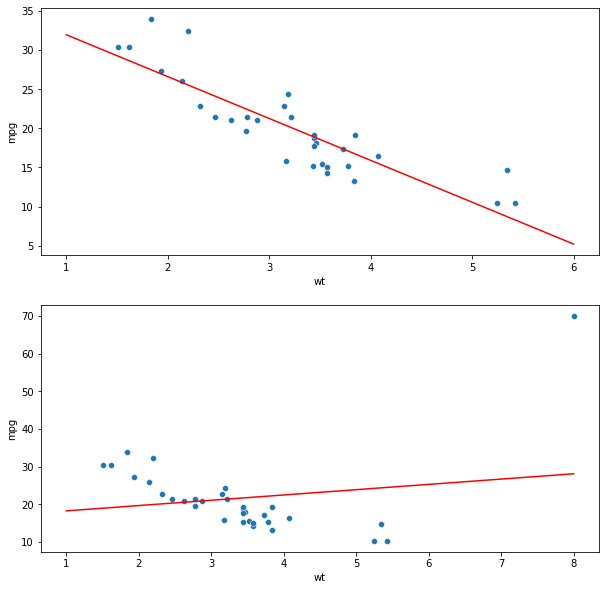

In [46]:
#Write your answer here
editedData = cars[['mpg', 'wt']]
newData = pd.DataFrame([[70, 8]], columns=['mpg', 'wt'])
editedData = editedData.append(newData, ignore_index=True)

linearSpace3 = np.linspace(1, 6, num=10)
linearSpace4 = np.linspace(1, 8, num=10)
carRegression2 = linear_model.LinearRegression()
carRegression2 = carRegression2.fit((np.array(editedData['wt']).reshape(-1,1)), editedData['mpg'])
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(2,1,1)
sns.scatterplot(x=cars['wt'], y=cars['mpg'])
sns.lineplot(x=linearSpace3, y=((linearSpace3*carRegression.coef_) + carRegression.intercept_), color='r')
ax2 = fig.add_subplot(2,1,2)
sns.scatterplot(x=editedData['wt'], y=editedData['mpg'])
sns.lineplot(x=linearSpace4, y=((linearSpace4*carRegression2.coef_) + carRegression2.intercept_), color='r')

**TC7) Calculate 𝑅2, Mean Absolute Error, Mean Squared Error and Root Mean Squared Error of this NEW linear regression model. You may use the appropriate sklearn.metrics methods. What is the difference with the results in TC5?**

In [36]:
#Write your answer here
predictedEditedValues = carRegression.predict(np.array(editedData['wt']).reshape(-1,1))
realEditedValues = (np.array(editedData['mpg']).reshape(-1,1))
carR2_2 = metrics.r2_score(realEditedValues, predictedEditedValues)
carMAE_2 = metrics.mean_absolute_error(realEditedValues, predictedEditedValues)
carMSE_2 = metrics.mean_squared_error(realEditedValues, predictedEditedValues)
print("no outlier:")
print(f"R² : {carR2},\nMAE : {carMAE}, \nMSE : {carMSE}")
print("outlier: ")
print(f"R² : {carR2_2},\nMAE : {carMAE_2}, \nMSE : {carMSE_2}")

no outlier:
R² : 0.7528327936582646,
MAE : 2.340641858325169, 
MSE : 8.697560548229477
outlier: 
R² : -0.686890879578409,
MAE : 4.5567026024498425, 
MSE : 181.03455781080837


**TC8) Looking at the plot in task TC3, it might be possible to fit a better model through polynomial regression. Try to fit a polynomial regression model of degree 2.**

* Hint: You might want to check https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

In [37]:
#Write your answer here
# cars[['mpg','cyl','disp','hp','drat','wt','qsec','vs','am','gear','carb']].values
poly = preprocessing.PolynomialFeatures(2)
poly.fit_transform(cars[['mpg','cyl','disp','hp','drat','wt','qsec','vs','am','gear','carb']].values)

array([[ 1. , 21. ,  6. , ..., 16. , 16. , 16. ],
       [ 1. , 21. ,  6. , ..., 16. , 16. , 16. ],
       [ 1. , 22.8,  4. , ..., 16. ,  4. ,  1. ],
       ...,
       [ 1. , 19.7,  6. , ..., 25. , 30. , 36. ],
       [ 1. , 15. ,  8. , ..., 25. , 40. , 64. ],
       [ 1. , 21.4,  4. , ..., 16. ,  8. ,  4. ]])

**TC9) Print the new intercept and regression coefficients of the new regression model**

In [38]:
#Write your answer here


**TC10) Plot the polynomial regression model alongside the scatter plot**

In [39]:
#Write your answer here


**TC11) Following from task TC8, try to fit and plot a polynomial regression model of degree 10**

In [40]:
#Write your answer here


**TC12) Calculate the Pearson correlation coefficient for several other variables to check how they are collerated with the mpg  variable. You may use the  scipy.stats.pearsonr method or similar.**

**Hint:** Think which variables might increase or decrease fuel consumption

In [41]:
#Write your answer here


**TC13) Select two variables that are most strongly (positively or negatively) correlated with mpg and train a multiple linear regression model**

**Hint:** The commands are exactly the same (with more dimensions in the independent variables) as in TC4

In [42]:
#Write your answer here
#Answer: Selecting weight and horsepower
carsDFXMulti = pd.DataFrame(dfCars[['wt', 'hp']])
carsDFYMulti = dfCars['mpg']

regCarsMulti = linear_model.LinearRegression()
regCarsMulti.fit(carsDFXMulti, carsDFYMulti)


**TC14) Calculate  𝑅2 , Mean Absolute Error, Mean Squared Error and Root Mean Squared Error of this multiple linear regression model. You may use the appropriate sklearn.metrics methods.**

In [43]:
#Write your answer here



In [44]:
### Cars dataset variables
# mpg:   Miles/(US) gallon
# cyl:   Number of cylinders
# disp:  Displacement (cu.in.), the measure of the cylinder volum
# hp:    Gross horsepower
# drat:  Rear axle ratio
# wt:    Weight (lb/1000)
# qsec:  1/4 mile time
# vs:    V type engine
# am:    Transmission (0 = automatic, 1 = manual)
# gear:  Number of forward gears
# carb:  Number of carburetors

In [47]:
plt.subplots(figsize=(7,6), dpi=100)
correlation_matrix = cars.corr().round(2)

sns.heatmap(data=correlation_matrix, annot=True)


NameError: name 'dfCars' is not defined